<a href="https://colab.research.google.com/github/huijeong728/advanced-statistics/blob/master/HW3_2018220084_%EB%AC%B8%ED%9D%AC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fashion Mnist 데이터를 잘 적합시키는 CNN 기반 모형찾기

In [1]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


### **1) Fashion Mnist 데이터셋 임포트하기**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **2) 데이터 전처리**

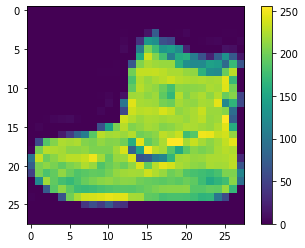

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

### **3-1) 첫 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [10]:
model1=Sequential()
model1.add( Conv2D(input_shape=(28, 28, 1),
                  filters=32,kernel_size=(3, 3),strides=(1 ,1),
                  padding='same',activation='relu'))
model1.add(Flatten())
model1.add(Dense(128,activation ='relu'))
model1.add(Dense(10, activation ='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


#### (2) 모델 컴파일

In [0]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [12]:
model1.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 40s 662us/sample - loss: 21.2635 - accuracy: 0.6215
Epoch 2/5
60000/60000 [==============================] - 39s 645us/sample - loss: 0.8285 - accuracy: 0.7645
Epoch 3/5
60000/60000 [==============================] - 39s 645us/sample - loss: 0.6804 - accuracy: 0.7821
Epoch 4/5
60000/60000 [==============================] - 39s 645us/sample - loss: 0.5611 - accuracy: 0.8254
Epoch 5/5
60000/60000 [==============================] - 39s 642us/sample - loss: 0.4084 - accuracy: 0.8652


#### 4) 정확도 평가

In [14]:
test1_loss, test1_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test1_acc)

10000/1 - 3s - loss: 0.3448 - accuracy: 0.8708

테스트 정확도: 0.8708


### **3-2) 두 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [16]:
model2= Sequential()
model2.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model2.add(AveragePooling2D(pool_size=2, padding='valid')) 
model2.add(Conv2D( 16, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model2.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model2.add(Flatten())
model2.add(Dense(84,activation ='tanh'))
model2.add(Dense(10, activation ='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

#### (2) 모델 컴파일

In [0]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [18]:
model2.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 464us/sample - loss: 0.8676 - accuracy: 0.6938
Epoch 2/5
60000/60000 [==============================] - 27s 455us/sample - loss: 0.4622 - accuracy: 0.8340
Epoch 3/5
60000/60000 [==============================] - 27s 457us/sample - loss: 0.3892 - accuracy: 0.8595
Epoch 4/5
60000/60000 [==============================] - 28s 459us/sample - loss: 0.3580 - accuracy: 0.8713
Epoch 5/5
60000/60000 [==============================] - 28s 459us/sample - loss: 0.3338 - accuracy: 0.8796


#### 4) 정확도 평가

In [20]:
test2_loss, test2_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test2_acc)

10000/1 - 3s - loss: 0.2515 - accuracy: 0.8736

테스트 정확도: 0.8736


### **3-3) 세 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [22]:
model3= Sequential()
model3.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model3.add(AveragePooling2D(pool_size=2, padding='valid')) 
model3.add(Conv2D( 50, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model3.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model3.add(Flatten())
model3.add(Dense(84,activation ='tanh'))
model3.add(Dense(10, activation ='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 50)        7550      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         150120    
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

#### (2) 모델 컴파일

In [0]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [24]:
model3.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 826us/sample - loss: 0.7173 - accuracy: 0.7517
Epoch 2/5
60000/60000 [==============================] - 49s 819us/sample - loss: 0.4194 - accuracy: 0.8505
Epoch 3/5
60000/60000 [==============================] - 49s 820us/sample - loss: 0.3628 - accuracy: 0.8704
Epoch 4/5
60000/60000 [==============================] - 49s 820us/sample - loss: 0.3282 - accuracy: 0.8815
Epoch 5/5
60000/60000 [==============================] - 49s 821us/sample - loss: 0.3057 - accuracy: 0.8907


#### 4) 정확도 평가

In [25]:
test3_loss, test3_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test3_acc)

10000/1 - 3s - loss: 0.2075 - accuracy: 0.8807

테스트 정확도: 0.8807


### **3-4) 네 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [37]:
model4= Sequential()
model4.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model4.add(AveragePooling2D(pool_size=2, padding='valid')) 
model4.add(Conv2D( 50, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
#model4.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model4.add(Flatten())
model4.add(Dense(84,activation ='tanh'))
model4.add(Dense(10, activation ='softmax'))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 50)        7550      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 1, 1, 120)         150120    
_________________________________________________________________
flatten_4 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

#### (2) 모델 컴파일

In [0]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [39]:
model4.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 838us/sample - loss: 0.6887 - accuracy: 0.7586
Epoch 2/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.3859 - accuracy: 0.8624
Epoch 3/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.3282 - accuracy: 0.8830
Epoch 4/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.2942 - accuracy: 0.8942
Epoch 5/5
60000/60000 [==============================] - 50s 829us/sample - loss: 0.2762 - accuracy: 0.9000


#### 4) 정확도 평가

In [40]:
test4_loss, test4_acc = model4.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test4_acc)

10000/1 - 3s - loss: 0.3480 - accuracy: 0.8895

테스트 정확도: 0.8895


### **3-5) 다섯 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [42]:
model5= Sequential()
model5.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model5.add(AveragePooling2D(pool_size=2, padding='valid')) 
model5.add(Conv2D( 50, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Conv2D( 50, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model5.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model5.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model5.add(Flatten())
model5.add(Dense(84,activation ='tanh'))
model5.add(Dense(10, activation ='softmax'))
model5.summary()

ValueError: ignored

#### (2) 모델 컴파일

In [0]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [0]:
model4.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 838us/sample - loss: 0.6887 - accuracy: 0.7586
Epoch 2/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.3859 - accuracy: 0.8624
Epoch 3/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.3282 - accuracy: 0.8830
Epoch 4/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.2942 - accuracy: 0.8942
Epoch 5/5
60000/60000 [==============================] - 50s 829us/sample - loss: 0.2762 - accuracy: 0.9000


#### 4) 정확도 평가

In [0]:
test4_loss, test4_acc = model4.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test4_acc)

10000/1 - 3s - loss: 0.3480 - accuracy: 0.8895

테스트 정확도: 0.8895


### **4) 결론**

In [41]:
print('\n 첫 번째 모델에서의 테스트 정확도:', test1_acc ,
      '\n 두 번째 모델에서의 테스트 정확도:', test2_acc ,
      '\n 세 번째 모델에서의 테스트 정확도:', test3_acc , 
      '\n 네 번째 모델에서의 테스트 정확도:', test4_acc , )


 첫 번째 모델에서의 테스트 정확도: 0.8708 
 두 번째 모델에서의 테스트 정확도: 0.8736 
 세 번째 모델에서의 테스트 정확도: 0.8807 
 네 번째 모델에서의 테스트 정확도: 0.8895


> **Fashion Mnist 데이터를 가장 잘 적합시키는 CNN 기반 모형은 세 번째 모델입니다.**

In [30]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 50)        7550      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         150120    
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               